# Step 1: Setup

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [4]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [5]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [8]:
x_train.min(), x_train.max()

(0, 255)

In [9]:
y_train.min(), y_train.max()

(0, 9)

In [10]:
# normalize th dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
x_train.min(), x_train.max()

(0.0, 1.0)

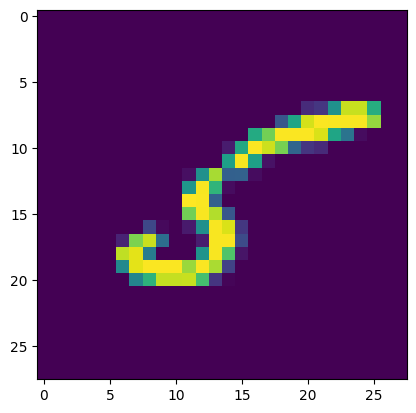

In [12]:
plt.imshow(x_train[11])

In [13]:
y_train[11]

5

# Step 3: Building the LSTM

In [14]:
# define an object initializing RNN
model = tf.keras.models.Sequential()

In [15]:
# adding the first LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True,input_shape=(28,28)))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# adding the second LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fully connected layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [18]:
# Compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [19]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 114s 59ms/step - loss: 0.6815 - accuracy: 0.7757 - val_loss: 0.1581 - val_accuracy: 0.9528
Epoch 2/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.1621 - accuracy: 0.9573 - val_loss: 0.1475 - val_accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1135 - accuracy: 0.9699 - val_loss: 0.0718 - val_accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0837 - accuracy: 0.9792 - val_loss: 0.0561 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0723 - accuracy: 0.9811 - val_loss: 0.0518 - val_accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0575 - accuracy: 0.9845 - val_loss: 0.0488 - val_accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0551 - accuracy: 0.9859 - val_loss: 0

In [23]:
# prediction
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 6s 18ms/step


In [24]:
y_pred[10], y_test[10]

(0, 0)

In [25]:
y_pred[123], y_test[123]

(6, 6)

In [26]:
y_pred[3101], y_test[3101]

(7, 7)

In [27]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1127,    2,    0,    0,    1,    0,    3,    1,    1],
       [   1,    0, 1029,    0,    0,    0,    2,    0,    0,    0],
       [   0,    0,    2, 1005,    0,    1,    0,    1,    1,    0],
       [   3,    1,    0,    0,  948,    0,    1,    4,    2,   23],
       [   1,    0,    0,    5,    0,  883,    1,    1,    0,    1],
       [   8,    3,    0,    0,    2,    5,  937,    0,    3,    0],
       [   0,    1,   12,    1,    1,    0,    0, 1011,    0,    2],
       [   0,    0,    2,    5,    0,    3,    0,    2,  961,    1],
       [   0,    0,    1,    1,    0,    7,    0,    2,    5,  993]])

In [29]:
acc = accuracy_score(y_test, y_pred)
acc

0.9873

# Learning curve

In [32]:
def learning_curve (history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

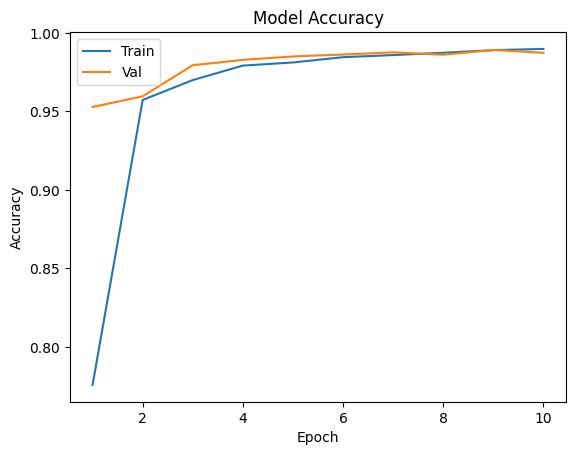

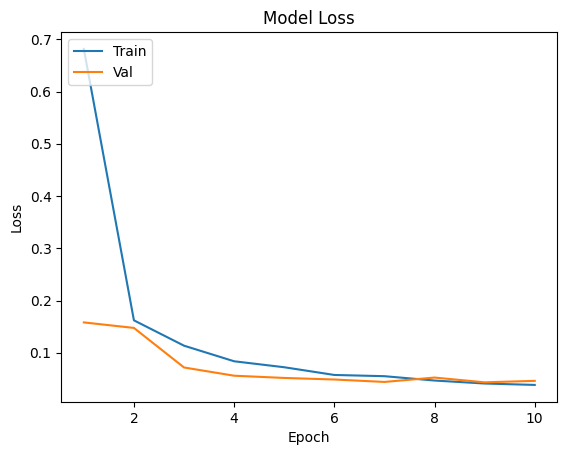

In [33]:
learning_curve(history, 10)